In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

ModuleNotFoundError: No module named 'geopandas'

### Exploratory Data Analysis

In [2]:
tree_data = pd.read_csv('2015StreetTreeCensus_TreeData.csv')

In [3]:
#printing sample dataset
tree_data.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,8/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,9/3/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,9/5/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [4]:
# printing the shape of original data
tree_data.shape

(683788, 45)

In [5]:
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

#### Getting to know the Dataset

In [6]:
# To get unique values in curb_loc
print(f"Unique location of the tree: {tree_data['curb_loc'].unique()}")

Unique location of the tree: ['OnCurb' 'OffsetFromCurb']


In [7]:
# To get unique values in curb_loc
print(f"Status of Tree: {tree_data['status'].unique()}")

Status of Tree: ['Alive' 'Stump' 'Dead']


In [8]:
# size of each group
tree_status = tree_data.groupby('status').size()
tree_status

status
Alive    652173
Dead      13961
Stump     17654
dtype: int64

In [9]:
# To get unique values in curb_loc
print(f"Health of Tree: {tree_data['health'].unique()}")

Health of Tree: ['Fair' 'Good' 'Poor' nan]


In [10]:
# To get unique values in curb_loc
print(f"Number of zipcodes: {len(tree_data['postcode'].unique())}")

Number of zipcodes: 191


In [11]:
# size of each group
tree_health = tree_data.groupby('health').size()
tree_health

health
Fair     96504
Good    528850
Poor     26818
dtype: int64

### Handling missing values

In [12]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
tree_data.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state      

In [13]:
data = tree_data.dropna(axis = 0, how ='any')

The NaN values were dropped from the dataset. 31664 rows were for stump or dead trees. It makes sense to remove them from the dataset as the tree does not exist anymore. Remaining 9559 datapoints that were missing location data were removed.

In [14]:
# shape of data after removing NaN values
data.shape

(642961, 45)

### Handling duplicate values 

In [15]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl


There is no duplicate value in the data. 

### Handling outliers

In [16]:
# Possibility of having outliers is in columns -  Diameter at breast height of tree and Diameter of stump

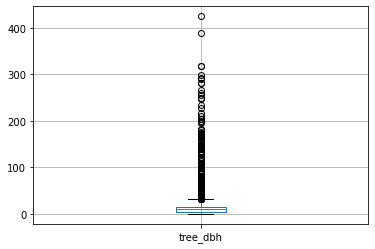

In [17]:
data.boxplot(column =['tree_dbh'])
plt.show()

In [18]:
data['tree_dbh'].describe()

count    642961.000000
mean         11.721552
std           8.641866
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

The diameter breast at height from tree has a wide range. Removing ouliers is not a right approach. As the diameter of a tree would probably depend on its age. Ther might be some trees that are older and so have diameter more than 75th percentile  

### Other columns of interest

### Empirical Cumulative Distribution Function - ECDF

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [20]:
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,8/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,9/3/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,9/5/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,9/5/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,8/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [21]:
#subsetting data containing columns of interest
tree_dbh_data = data[['health','tree_dbh']]

In [22]:
fair_tree_dbh = tree_dbh_data[(tree_dbh_data['health'] == 'Fair')]

In [23]:
fair_tree_dbh.head()

,health,tree_dbh
0,Fair,3
1,Fair,21
9,Fair,21
12,Fair,13
14,Fair,30


In [24]:
fair_tree_dbh = fair_tree_dbh['tree_dbh']

In [25]:
good_tree_dbh = tree_dbh_data[(tree_dbh_data['health'] == 'Good')]

In [26]:
good_tree_dbh.head(5)

,health,tree_dbh
2,Good,3
3,Good,10
4,Good,21
5,Good,11
6,Good,11


In [27]:
good_tree_dbh = good_tree_dbh['tree_dbh']

In [28]:
poor_tree_dbh = tree_dbh_data[(tree_dbh_data['health'] == 'Poor')]

In [29]:
poor_tree_dbh.head()

,health,tree_dbh
11,Poor,8
73,Poor,5
85,Poor,3
88,Poor,3
140,Poor,3


In [30]:
poor_tree_dbh = poor_tree_dbh['tree_dbh']

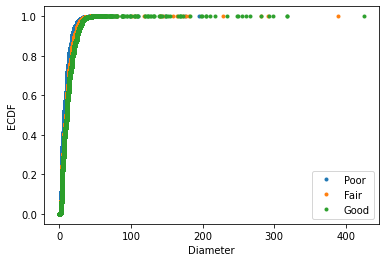

In [31]:
# Compute ECDFs
x_poor, y_poor = ecdf(poor_tree_dbh)
x_fair, y_fair = ecdf(fair_tree_dbh)
x_good, y_good = ecdf(good_tree_dbh)

# Plot all ECDFs on the same plot
_ = plt.plot(x_poor, y_poor, marker='.', linestyle='none')
_ = plt.plot(x_fair, y_fair, marker='.', linestyle='none')
_ = plt.plot(x_good, y_good, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('Poor', 'Fair', 'Good'), loc='lower right')
_ = plt.xlabel('Diameter')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

There is no clear difference in the distribution of diametere based on the health of the tree

Questions to explore

- What is the density of tress in each neighbourhood /borough/census track
- Leafiest block (https://www.nycgovparks.org/trees/treescount)


In [32]:
# import street map
street_map = gpd.read_file(r'C:\Users\parij\Desktop\Data Analysis\Springboard\Borough Boundaries\geo_export_0a111f79-05ee-4be3-9497-45c06bba38ce.shp')

In [33]:
# designate coordinate system
# crs = "EPSG:2163"
crs ='EPSG:4326'
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(data,
 crs = crs,
 geometry = geometry)

In [34]:
geo_df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl,geometry
0,180683,348711,8/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09,POINT (-73.84422 40.72309)
1,200540,315986,9/3/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09,POINT (-73.81868 40.79411)
2,204026,218365,9/5/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09,POINT (-73.93661 40.71758)
3,204337,217969,9/5/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09,POINT (-73.93446 40.71354)
4,189565,223043,8/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09,POINT (-73.97598 40.66678)


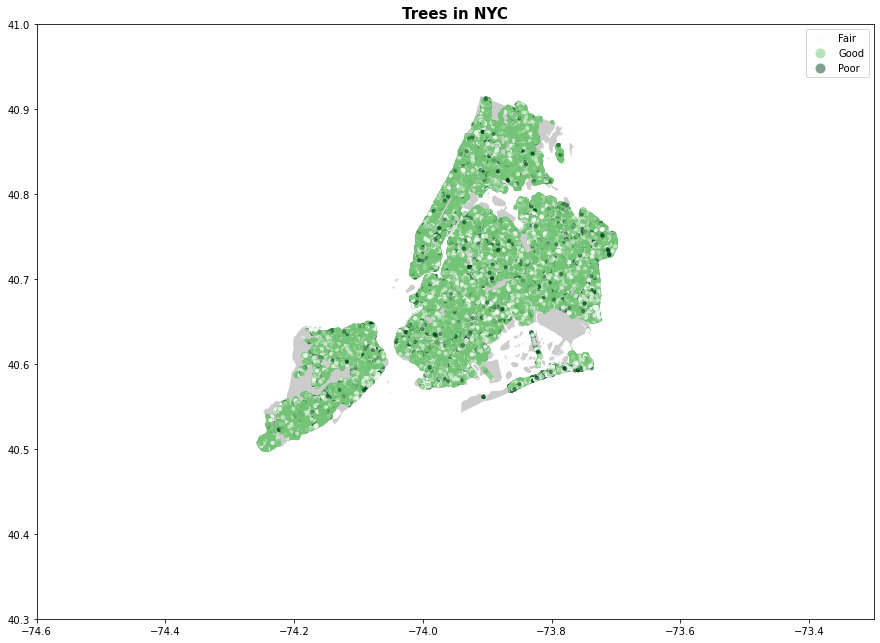

In [35]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color= 'grey')
# add geodataframe to axes
# assign ‘health’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='health',ax=ax,alpha=0.5, legend=True,markersize=10,cmap = 'Greens')
# add title to graph
plt.title('Trees in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.6,-73.3)
plt.ylim( 40.3,41.0)
# show map
plt.show()

code source: https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391